In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import json

In [2]:
file = 'data\landcover\C3S-LC-L4-LCCS-Map-300m-P1Y-2019-v2.1.1.nc'
# https://cds.climate.copernicus.eu/

In [3]:
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:              (time: 1, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat                  (lat) float64 90.0 90.0 89.99 ... -89.99 -90.0 -90.0
  * lon                  (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 2019-01-01
Dimensions without coordinates: bounds
Data variables:
    lccs_class           (time, lat, lon) uint8 ...
    processed_flag       (time, lat, lon) float32 ...
    current_pixel_state  (time, lat, lon) float32 ...
    observation_count    (time, lat, lon) uint16 ...
    change_count         (time, lat, lon) uint8 ...
    crs                  int32 ...
    lat_bounds           (lat, bounds) float64 ...
    lon_bounds           (lon, bounds) float64 ...
    time_bounds          (time, bounds) datetime64[ns] ...
Attributes: (12/38)
    title:                      Land Cover Map of 2019
    summary:                    This dataset characterizes the land cover of ...
    type:                       C3S-LC-L4-LCCS-Map-300m-P1Y
    references:                 https://cds.climate.copernicus.eu/
    institution:                UCLouvain
    contact:                    copernicus-support@ecmwf.int
    ...                         ...
    geospatial_lon_units:       degrees_east
    geospatial_lon_resolution:  0.002778
    id:                         C3S-LC-L4-LCCS-Map-300m-P1Y-2019-v2.1.1
    project:                    EC C3S Land Cover
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0

In [4]:
# drop variables that are not needed: processed_flag, current_pixel_state, observation_count, change_count, crs, time_bounds
ds = ds.drop(['processed_flag', 'current_pixel_state', 'observation_count', 'change_count', 'crs', 'time_bounds'])

In [5]:
central_lat = -33.5
central_lon = 18.5

lat_min = central_lat - 0.5
lat_max = central_lat + 0.5

lon_min = central_lon - 0.5
lon_max = central_lon + 0.5
filtered_ds = ds.sel(lat=slice(lat_max, lat_min), lon=slice(lon_min, lon_max))

In [6]:
df = filtered_ds.to_dataframe()
df

lccs_class  lat_bounds  lon_bounds
time       lat        lon       bounds                                    
2019-01-01 -33.001389 18.001389 0              190  -33.000000   18.000000
                                1              190  -33.002778   18.002778
                      18.004167 0              120  -33.000000   18.002778
                                1              120  -33.002778   18.005556
                      18.006944 0              120  -33.000000   18.005556
...                                            ...         ...         ...
           -33.998611 18.993056 1              100  -34.000000   18.994444
                      18.995833 0              100  -33.997222   18.994444
                                1              100  -34.000000   18.997222
                      18.998611 0              120  -33.997222   18.997222
                                1              120  -34.000000   19.000000

[259200 rows x 3 columns]

In [7]:
df.reset_index(inplace=True)
pivot_df = df.pivot_table(index='lat', columns='lon', values='lccs_class', aggfunc='mean')
aligned_df = pivot_df.transpose()
aligned_df

lat,-33.998611,-33.995833,-33.993056,-33.990278,-33.987500,-33.984722,-33.981944,-33.979167,-33.976389,-33.973611,...,-33.026389,-33.023611,-33.020833,-33.018056,-33.015278,-33.012500,-33.009722,-33.006944,-33.004167,-33.001389
lon,,,,,,,,,,,,,,,,,,,,,
18.001389,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,190,190,190
18.004167,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,120
18.006944,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,120,120
18.009722,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,100,120,120
18.012500,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,100,120,120,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18.987500,120,120,120,120,120,120,120,120,120,120,...,190,190,190,11,11,11,11,11,11,11
18.990278,100,120,120,120,120,120,120,120,120,120,...,190,190,11,11,190,110,110,11,11,11
18.993056,100,120,120,120,120,200,120,120,120,120,...,120,11,120,120,190,190,190,190,11,11


In [8]:
# downscale by taking the most dominant value in every 3x3 group - the mode
downscaled_df = aligned_df.groupby(np.arange(len(aligned_df))//3).apply(lambda x: x.mode().iloc[0])

# all values to int
downscaled_df = downscaled_df.astype(int)

# do it again

# downscale by taking the most dominant value in every 3x3 group - the mode

downscaled_df = downscaled_df.groupby(np.arange(len(downscaled_df))//3).apply(lambda x: x.mode().iloc[0])

# all values to int

downscaled_df = downscaled_df.astype(int)








In [9]:
with open('data/landcover/lccs_class.json', 'r') as json_file:
    color_data = json.load(json_file)

In [10]:
value_to_color = {entry['class']: entry['color'] for entry in color_data}

In [11]:
aligned_df = downscaled_df

In [12]:
for x in aligned_df.columns:
    for y in aligned_df.index:
        aligned_df.at[y, x] = value_to_color.get(aligned_df.at[y, x], None)

In [13]:
aligned_df

lat,-33.998611,-33.995833,-33.993056,-33.990278,-33.987500,-33.984722,-33.981944,-33.979167,-33.976389,-33.973611,...,-33.026389,-33.023611,-33.020833,-33.018056,-33.015278,-33.012500,-33.009722,-33.006944,-33.004167,-33.001389
0,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#be9600,#966400,#966400,#966400
1,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#966400,#966400,#966400,#966400,#966400,#966400,#966400,#966400,#966400,#966400
2,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#ffff00,#ffff64,#ffff00,#ffff00,#ffff00,#ffff64,#ffff64,#ffff00,#ffff00,#ffff00
3,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#ffff00,#ffff00,#ffff64,#ffff00,#ffff00,#ffff64,#ffff00,#ffff00,#ffff00,#ffff00
4,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#ffff00,#ffff00,#ffff64,#ffff64,#966400,#ffff00,#ffff00,#ffff00,#966400,#966400
5,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00
6,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00,#ffff00
7,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#00a000,#966400,#ffff00,#ffff64,#ffff00,#ffff00,#ffff00,#00a000,#00a000,#00a000
8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#966400,#966400,#966400,#966400,#966400,#966400,#00a000,#00a000,#00a000,#00a000
9,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,#0046c8,...,#966400,#966400,#966400,#966400,#966400,#966400,#966400,#966400,#966400,#966400


In [14]:
# convert each color value (like #cccddd) in df to a float for matplotlib
def hextofloats(h):
    '''Takes a hex rgb string (e.g. #ffffff) and returns an RGB tuple (float, float, float).'''
    return tuple(int(h[i:i + 2], 16) / 255. for i in (1, 3, 5)) # skip '#'
    
aligned_df = aligned_df.applymap(hextofloats)
aligned_df


lat,-33.998611,-33.995833,-33.993056,-33.990278,-33.987500,-33.984722,-33.981944,-33.979167,-33.976389,-33.973611,...,-33.026389,-33.023611,-33.020833,-33.018056,-33.015278,-33.012500,-33.009722,-33.006944,-33.004167,-33.001389
0,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)",...,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.7450980392156863, 0.5882352941176471, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)"
1,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)",...,"(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)"
2,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)",...,"(1.0, 1.0, 0.0)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)"
3,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)",...,"(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)"
4,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.274509803921568

In [15]:
df = aligned_df
df

lat,-33.998611,-33.995833,-33.993056,-33.990278,-33.987500,-33.984722,-33.981944,-33.979167,-33.976389,-33.973611,...,-33.026389,-33.023611,-33.020833,-33.018056,-33.015278,-33.012500,-33.009722,-33.006944,-33.004167,-33.001389
0,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)",...,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.7450980392156863, 0.5882352941176471, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)"
1,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)",...,"(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)","(0.5882352941176471, 0.39215686274509803, 0.0)"
2,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)",...,"(1.0, 1.0, 0.0)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)"
3,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)",...,"(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.39215686274509803)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)"
4,"(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.27450980392156865, 0.7843137254901961)","(0.0, 0.274509803921568

C:\Users\dirkm\AppData\Local\Temp\ipykernel_17268\572699925.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color, edgecolor='black'))


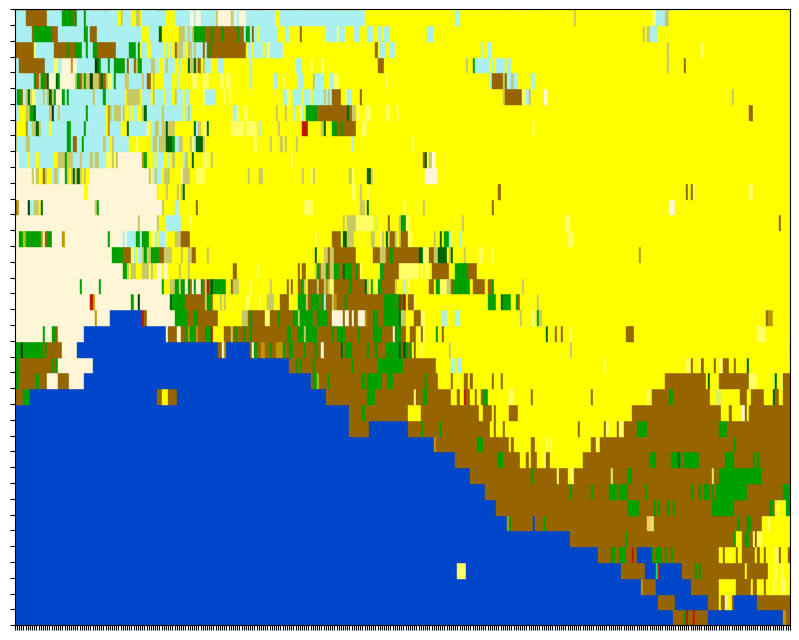

In [16]:
# Extract the RGB values from the DataFrame
rgb_values = df.values

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create a grid of colored squares
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        color = rgb_values[i, j]
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color, edgecolor='black'))

ax.set_xticks(range(len(df.columns)))
ax.set_yticks(range(len(df.index)))

# no tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

In [266]:
# plt save
fig.savefig('data/landcover/landcover.png', dpi=300, bbox_inches='tight')